# Assignment 1: Logistic Regression using Gradient Descent

In [1]:
import pandas as pd
import numpy as np

### Loading data

In [2]:
#import dữ liệu
data = pd.read_csv('predict+students+dropout+and+academic+success.csv', sep=';')
data.shape

(4424, 37)

### Prepocessing data

In [3]:
for col in data.columns:
    print(col)
    print(data[col].isna().sum(), data[col].isnull().sum())
    print(data[col].dtype)
    print('---')

Marital status
0 0
int64
---
Application mode
0 0
int64
---
Application order
0 0
int64
---
Course
0 0
int64
---
Daytime/evening attendance	
0 0
int64
---
Previous qualification
0 0
int64
---
Previous qualification (grade)
0 0
float64
---
Nacionality
0 0
int64
---
Mother's qualification
0 0
int64
---
Father's qualification
0 0
int64
---
Mother's occupation
0 0
int64
---
Father's occupation
0 0
int64
---
Admission grade
0 0
float64
---
Displaced
0 0
int64
---
Educational special needs
0 0
int64
---
Debtor
0 0
int64
---
Tuition fees up to date
0 0
int64
---
Gender
0 0
int64
---
Scholarship holder
0 0
int64
---
Age at enrollment
0 0
int64
---
International
0 0
int64
---
Curricular units 1st sem (credited)
0 0
int64
---
Curricular units 1st sem (enrolled)
0 0
int64
---
Curricular units 1st sem (evaluations)
0 0
int64
---
Curricular units 1st sem (approved)
0 0
int64
---
Curricular units 1st sem (grade)
0 0
float64
---
Curricular units 1st sem (without evaluations)
0 0
int64
---
Curricular 

In [4]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [5]:
def encoder_target(value: str) -> int:
    if (value == 'Graduate'):
        return 1 
    return 0 # Non-graduate

data['Target'] = data['Target'].apply(encoder_target)

In [6]:
data['Target'].unique()

array([0, 1])

### Feature Engineering

In [7]:
corr = data.iloc[:,:-1].corr()
print(corr.shape)

(36, 36)


<Axes: >

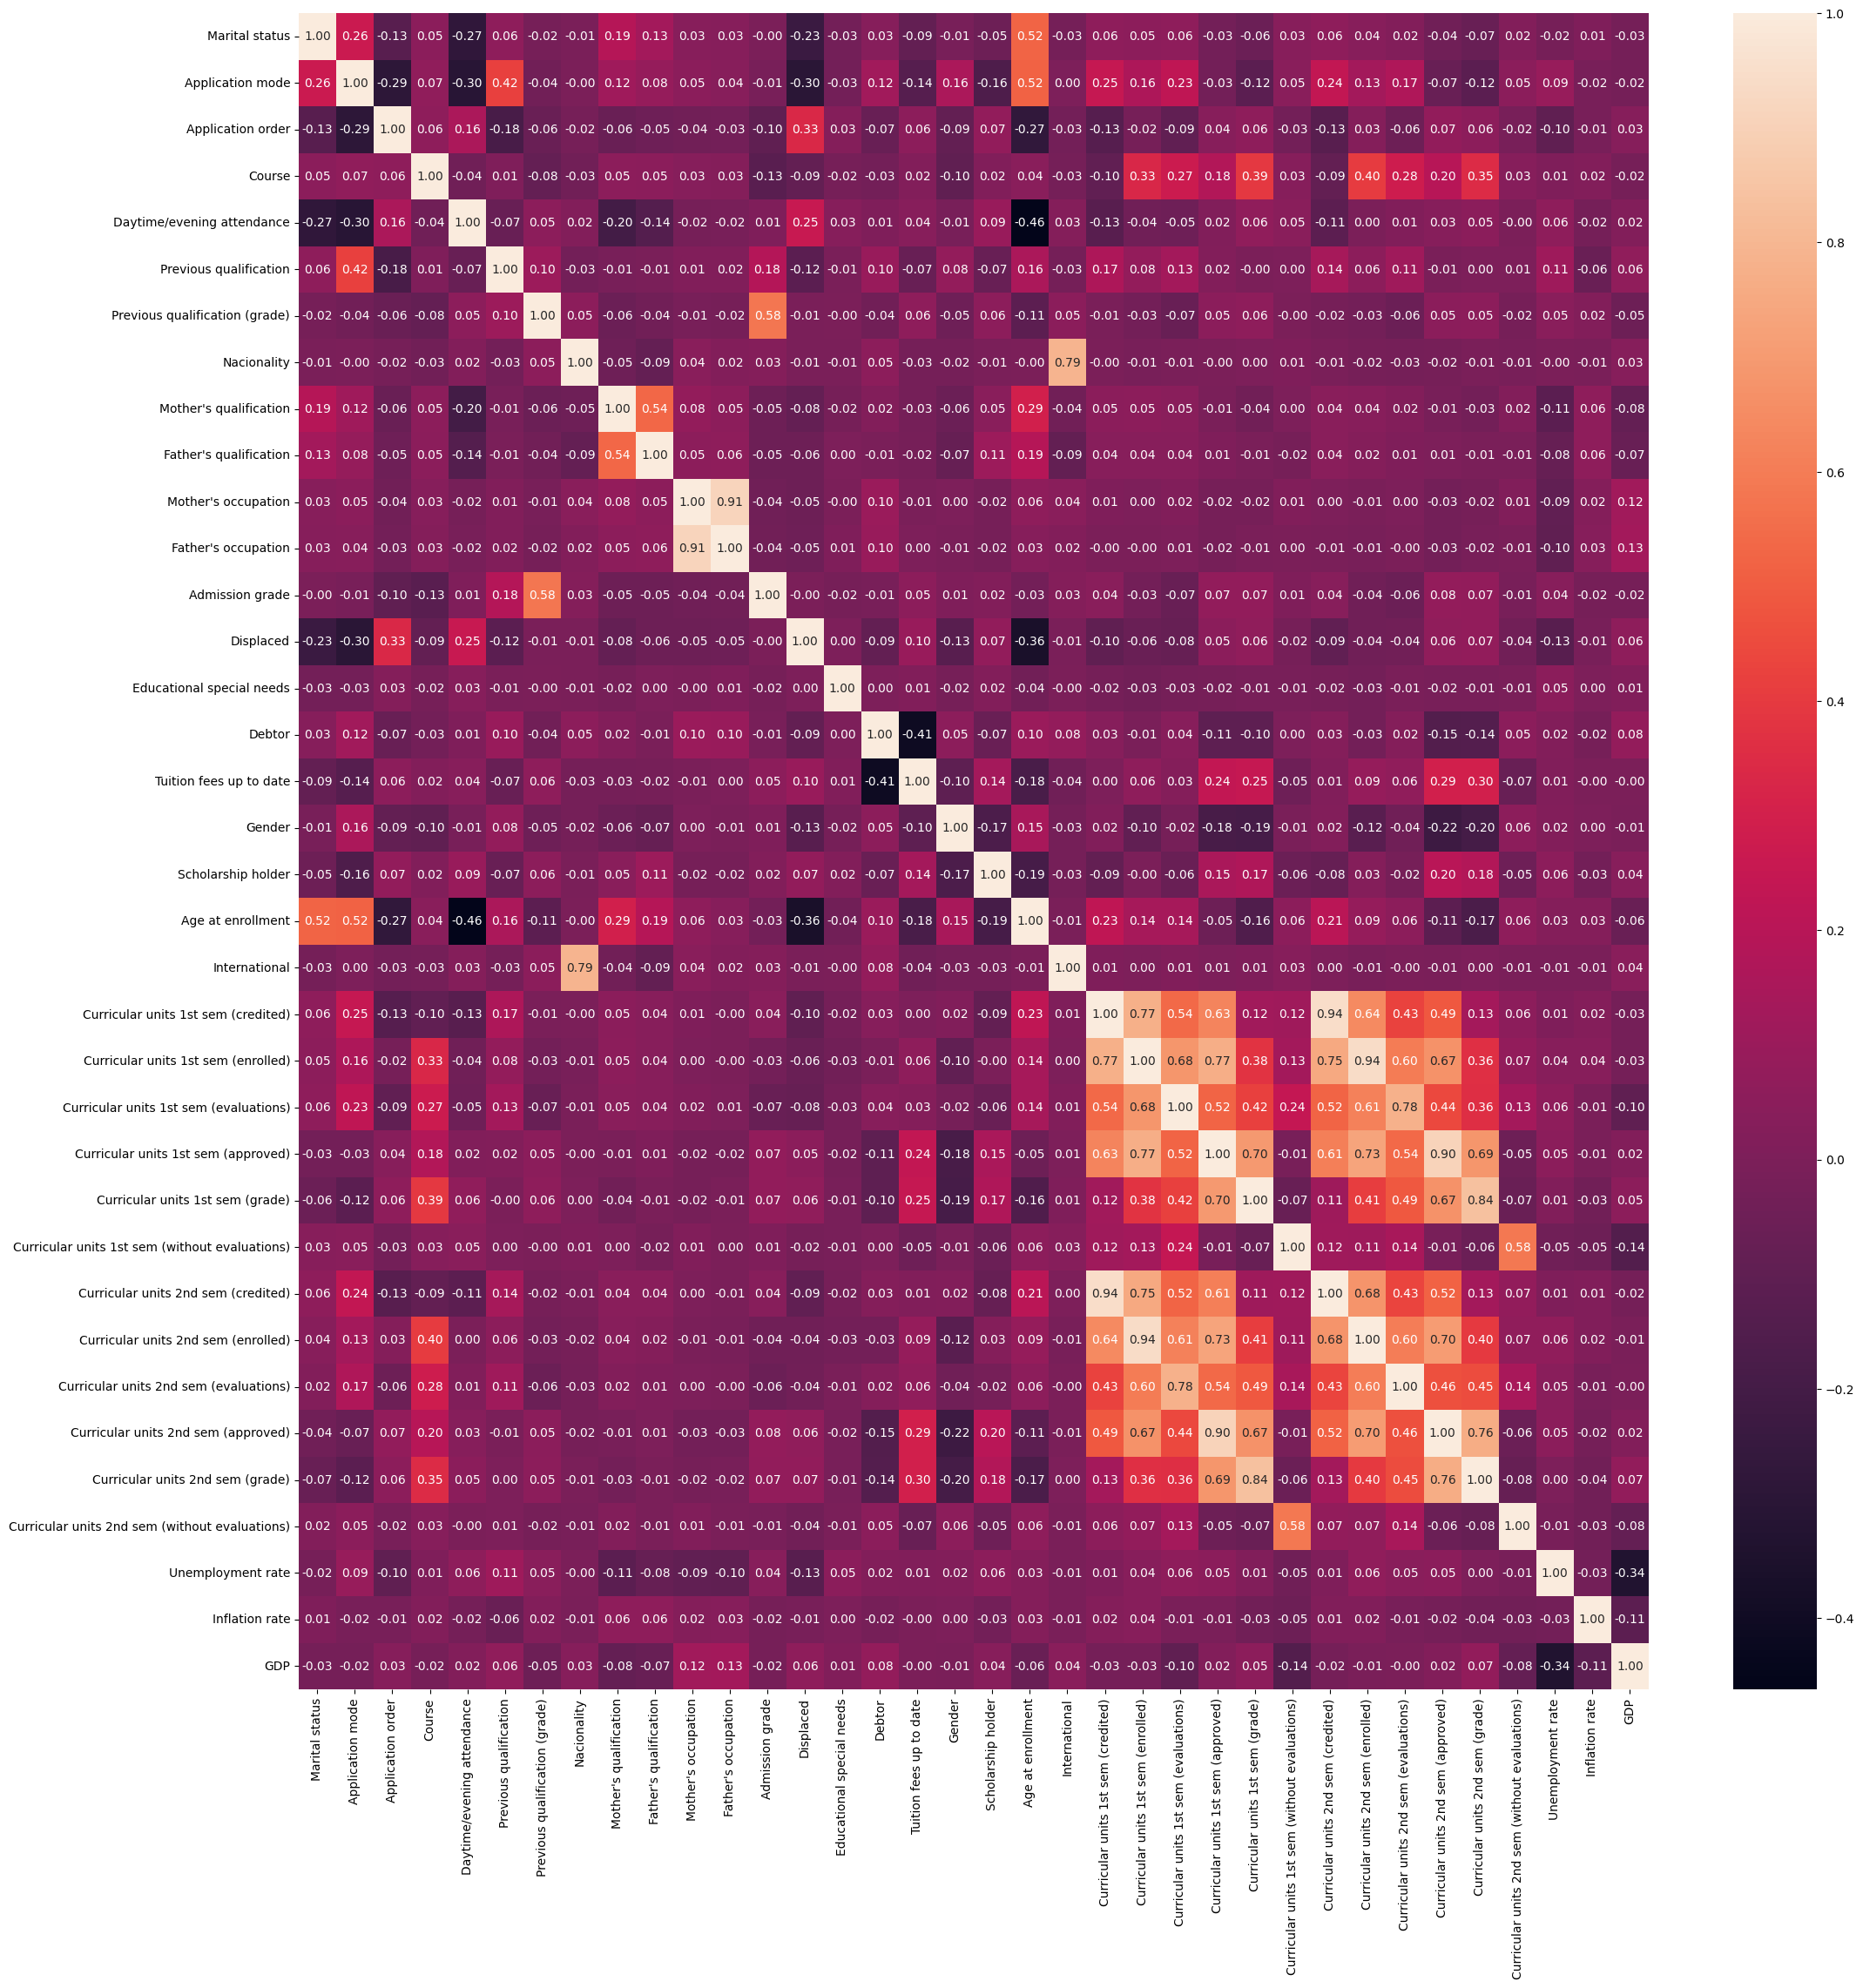

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

data.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)

plt.figure(figsize=(25,25))
sns.heatmap(corr, xticklabels=data.columns[:-1], yticklabels=data.columns[:-1], annot=True, fmt='.2f')

In [9]:
data = data.drop(['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)'], axis = 1)

### Splitting

In [10]:
X = data.drop(columns=['Target']).to_numpy()
y = data['Target'].to_numpy().reshape(-1,1)
print(X.shape, y.shape)

(4424, 34) (4424, 1)


In [11]:
split_index = int(0.8 * X.shape[0])
X_train, X_test = np.split(X, [split_index])
y_train, y_test = np.split(y, [split_index])

print('train:', X_train.shape, y_train.shape)
print('test:', X_test.shape, y_test.shape)

train: (3539, 34) (3539, 1)
test: (885, 34) (885, 1)


### Normalizing

In [12]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [13]:
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)
X_train = (X_train - X_min) / (X_max - X_min)
X_test = (X_test - X_min) / (X_max - X_min) 

In [14]:
print(X_train[:5,:])

[[0.         0.28571429 0.55555556 0.0138582  1.         0.
  0.28421053 0.         0.42857143 0.26190476 0.0257732  0.04615385
  0.34       1.         0.         0.         1.         1.
  0.         0.05660377 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.37209302 0.48888889 0.7661823 ]
 [0.         0.25       0.11111111 0.92598915 1.         0.
  0.68421053 0.         0.         0.04761905 0.01546392 0.01538462
  0.5        1.         0.         0.         0.         1.
  0.         0.03773585 0.         0.13333333 0.28571429 0.74172185
  0.         0.         0.26086957 0.21428571 0.3        0.73589744
  0.         0.73255814 0.11111111 0.64068692]
 [0.         0.         0.55555556 0.90751155 1.         0.
  0.28421053 0.         0.85714286 0.85714286 0.04639175 0.04615385
  0.31368421 1.         0.         0.         0.         1.
  0.         0.03773585 0.         0.         0.         0.
  0.         0.         0.

### Logistic Regression

In [15]:
class LogisticRegression:
    def __init__(self, epoch: int, lr: float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []

    def sigmoid(self, alpha: np.ndarray) -> np.ndarray:
        alpha = np.clip(alpha, -500, 500) #Giới hạn để tránh overflow
        return 1/(1 + np.exp(-alpha))
    
    def lossfn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        esp = 1e-10
        return -(y * np.log(y_hat + esp) + (1 - y) * np.log(1 - y_hat + esp)).mean()
    
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        y_pred = (y_hat >= 0.5).astype(int) #Chắc chắn giá trị ra 0 hoặc 1
        # return (1 - np.abs(y - y_hat)).mean()
        return (y_pred == y).mean()
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n = X.shape[0] # Số mẫu
        d = X.shape[1] # Số đặc trưng
        self.theta = np.zeros((d, 1))
        for e in range (self.epoch):
            #Vector gradient: 1/m X_T (X_theta - y)
            #Forward pass
            y_hat = self.predict(X)
            #Backward pass
            diff = y_hat - y
            gradient = (1 / n) * (X.T @ diff)
            self.theta -= self.lr*gradient

            #New evaluatation with new theta
            loss = self.lossfn(y, y_hat)
            acc = self.accuracy(y, y_hat)    

            self.losses.append(loss)
            self.metrics.append(acc)

    def predict(self, X: np.ndarray) -> np.ndarray:
        alpha = X @ self.theta
        y_hat = self.sigmoid(alpha)
        return y_hat
    
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        rmse = (((y - y_hat)**2).mean())**0.5
        return rmse

In [16]:
logisticReg = LogisticRegression(500, 0.5)

In [17]:
logisticReg.fit(X_train, y_train)

In [18]:
y_pred = logisticReg.predict(X_test)

In [19]:
rmse = logisticReg.rmse(y_test, y_pred)
print(rmse)

0.3626115289760981


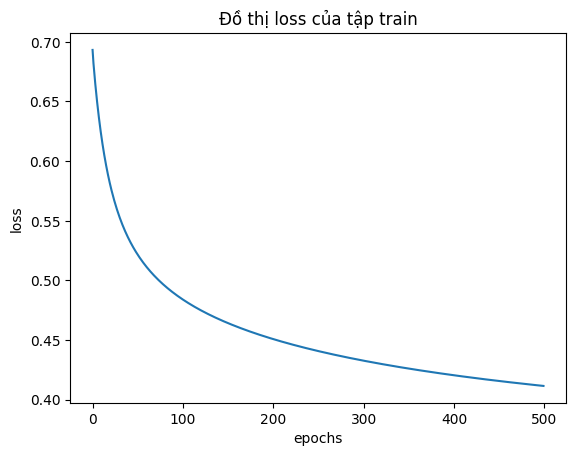

In [20]:
from matplotlib.pylab import plt

train_loss = logisticReg.losses

plt.plot(range(len(train_loss)), train_loss, label = 'Training loss')
plt.title('Đồ thị loss của tập train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()